In [32]:
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [33]:
unneeded_data = ['Place_of_isolation','Patient_In','Patient_out']
catigorical_data=['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type']
labels = ['Severeity','Outcome']
droped_col = unneeded_data+catigorical_data+labels

In [34]:
df = pd.read_csv("Covid-19_dataset.csv",header=1)



df['is_Male'] = pd.get_dummies(df['Gender'])['MALE']#one hot encoding gender so male = #1 and female = 0

blood_types = pd.get_dummies(df['Blood_Group']).columns

#     #All 
# blood_group_columns = pd.get_dummies(df[['Blood_Group','CONTROL_blood_group']]).columns
# df = pd.concat([df, pd.get_dummies(df[['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type']])], axis=1)
# df = df.drop(['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)


    #NO Blood control group
blood_group_columns = pd.get_dummies(df['Blood_Group']).columns

temp = []
for g in blood_group_columns:
    temp.append("Blood_Group_"+g)
blood_group_columns = temp
df = df.drop("CONTROL_blood_group",axis=1)



df = pd.concat([df, pd.get_dummies(df[['Blood_Group','Risk_Factor','Infection_type']])], axis=1)
df = df.drop(['Blood_Group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)




columns = df.columns



# getting rid of blank values
print("before",df.shape)
for name in columns:
    df = df[df[name] != " "]
    df = df.dropna()
    
label_Severeity = df['Severeity'] #Severeity vs Outcome
label_Outcome = df['Outcome']
df = df.drop(['Severeity','Outcome'],axis=1)


df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))#strings to numeric
all_columns = df.columns
# df = df.reset_index()

print("after",df.shape)


df_no_blood_data = copy.deepcopy(df.drop(blood_group_columns,axis=1))



before (5668, 49)
after (5641, 47)


In [35]:
df

,Age,Incubation period (days),Fever,Chills,Cough,Dyspnea,Anosmia_Ageusia,Loss_of_appetite,Asthenia,Headache,...,Risk_Factor_DMCKD,Risk_Factor_DMHT,Risk_Factor_HT,Risk_Factor_HT,Risk_Factor_NONE,Risk_Factor_RF,Infection_type_Asymptomatic,Infection_type_Asymtomatic,Infection_type_Symptomatic,Infection_type_Symtomatic
0,61.0,14,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,49.0,28,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,88.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,56.0,17,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
4,41.0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,65.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5664,32.0,7,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
5665,28.0,4,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5666,40.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [36]:
df_no_blood_data

,Age,Incubation period (days),Fever,Chills,Cough,Dyspnea,Anosmia_Ageusia,Loss_of_appetite,Asthenia,Headache,...,Risk_Factor_DMCKD,Risk_Factor_DMHT,Risk_Factor_HT,Risk_Factor_HT,Risk_Factor_NONE,Risk_Factor_RF,Infection_type_Asymptomatic,Infection_type_Asymtomatic,Infection_type_Symptomatic,Infection_type_Symtomatic
0,61.0,14,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,49.0,28,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,88.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,56.0,17,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
4,41.0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,65.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5664,32.0,7,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
5665,28.0,4,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5666,40.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [37]:
def get_Auc(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    
    # Training ONLY on the training set to get AUC:
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    prob = model.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prob[:,1], pos_label='Recovered')
    AUC = metrics.auc(fpr, tpr)
    
    %matplotlib inline
    
    return AUC,fpr,tpr

In [38]:
def compare_Blood_or_noBlood(model,y,blacklist_features):
    
    X_blood = df[[a for a in df.columns if a not in blacklist_features]]
    X_NoBlood = df_no_blood_data[[a for a in df_no_blood_data.columns if a not in blacklist_features]]
    
    AUC_WB,fpt_WB,tpr_WB = get_Auc(copy.deepcopy(model),X_blood,y)
    print("Area Under Curve With Blood: \t",AUC_WB)
    
    AUC_WOB,fpt_WOB,tpr_WOB = get_Auc(copy.deepcopy(model),X_NoBlood,y)
    print("Area Under Curve Without Blood: \t",AUC_WOB)
    
    print("With Blood - Without ")
    print("Differance:\t",AUC_WB - AUC_WOB)
    print("if AUC with blood is smaller then the value should be negitive")
    
    plt.plot(fpt_WB, tpr_WB,label="With Blood")
    plt.plot(fpt_WOB, tpr_WOB,label="Without Blood")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.figlegend()
    plt.show()
    
    return AUC_WOB,AUC_WB
    
    

In [39]:
blacklist = []

Logistic Regression
Area Under Curve With Blood: 	 0.9997943474939773
Area Under Curve Without Blood: 	 0.9997355896351137
With Blood - Without 
Differance:	 5.8757858863667245e-05
if AUC with blood is smaller then the value should be negitive


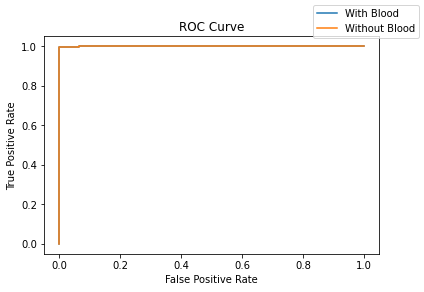

(0.9997355896351137, 0.9997943474939773)

In [40]:
print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Outcome,blacklist)

KNeighbors Classifier
Area Under Curve With Blood: 	 0.9991773899759092
Area Under Curve Without Blood: 	 0.9992655267642048
With Blood - Without 
Differance:	 -8.813678829555638e-05
if AUC with blood is smaller then the value should be negitive


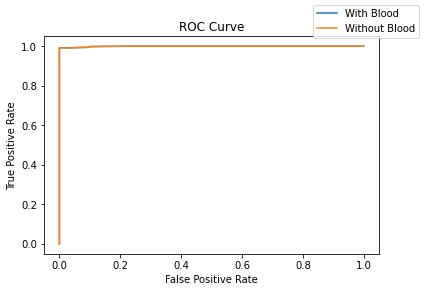

(0.9992655267642048, 0.9991773899759092)

In [41]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Outcome,blacklist)

Decision Tree
Area Under Curve With Blood: 	 0.9672865620776779
Area Under Curve Without Blood: 	 0.9672865620776779
With Blood - Without 
Differance:	 0.0
if AUC with blood is smaller then the value should be negitive


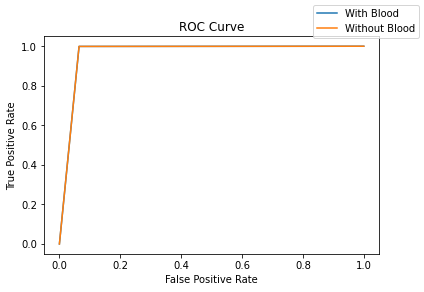

(0.9672865620776779, 0.9672865620776779)

In [42]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Outcome,blacklist)

Random Forest Classifier
Area Under Curve With Blood: 	 0.9998971737469886
Area Under Curve Without Blood: 	 0.9999118632117046
With Blood - Without 
Differance:	 -1.4689464715944567e-05
if AUC with blood is smaller then the value should be negitive


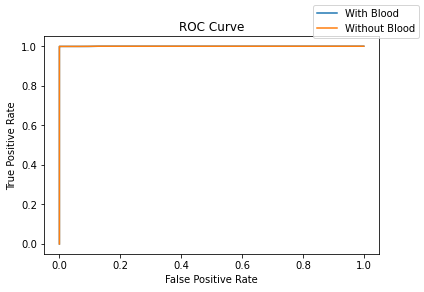

(0.9999118632117046, 0.9998971737469886)

In [43]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Outcome,blacklist)

Ada Boost Classifier
Area Under Curve With Blood: 	 0.9997209001703978
Area Under Curve Without Blood: 	 0.9998531053528409
With Blood - Without 
Differance:	 -0.000132205182443057
if AUC with blood is smaller then the value should be negitive


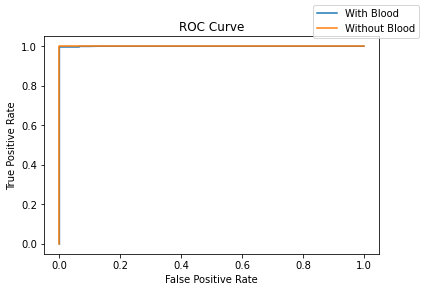

(0.9998531053528409, 0.9997209001703978)

In [44]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Outcome,blacklist)

## without the features from First Itteration of Boruta 

In [45]:
blacklist = ['Age', ' Incubation period (days)', 'Cyanosis', 'Risk_Factor_AT', 'Risk_Factor_COPD', 'Risk_Factor_DM', 'Risk_Factor_DMHT', 'Risk_Factor_HT', 'Risk_Factor_NONE']

Logistic Regression
Area Under Curve With Blood: 	 0.6714848110934838
Area Under Curve Without Blood: 	 0.6757006874669488
With Blood - Without 
Differance:	 -0.0042158763734649884
if AUC with blood is smaller then the value should be negitive


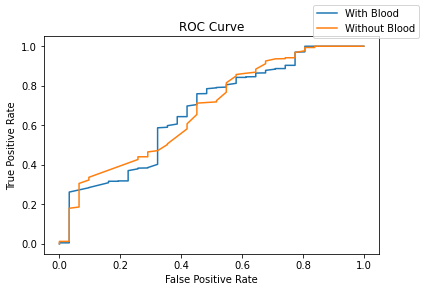

(0.6757006874669488, 0.6714848110934838)

In [46]:

print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Outcome,blacklist)

KNeighbors Classifier
Area Under Curve With Blood: 	 0.4687555085492685
Area Under Curve Without Blood: 	 0.49618073917386446
With Blood - Without 
Differance:	 -0.027425230624595953
if AUC with blood is smaller then the value should be negitive


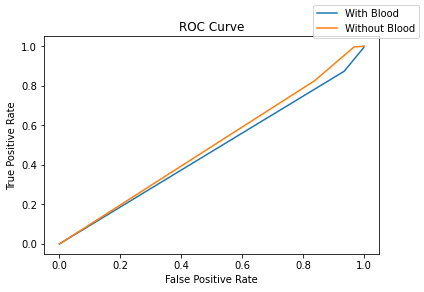

(0.49618073917386446, 0.4687555085492685)

In [47]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Outcome,blacklist)

Decision Tree
Area Under Curve With Blood: 	 0.5376637875315824
Area Under Curve Without Blood: 	 0.6146072037134968
With Blood - Without 
Differance:	 -0.07694341618191436
if AUC with blood is smaller then the value should be negitive


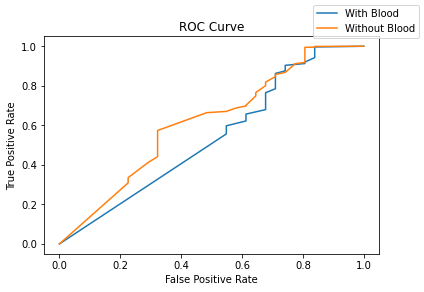

(0.6146072037134968, 0.5376637875315824)

In [48]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Outcome,blacklist)

Random Forest Classifier
Area Under Curve With Blood: 	 0.5633115929255538
Area Under Curve Without Blood: 	 0.6161495975086668
With Blood - Without 
Differance:	 -0.05283800458311305
if AUC with blood is smaller then the value should be negitive


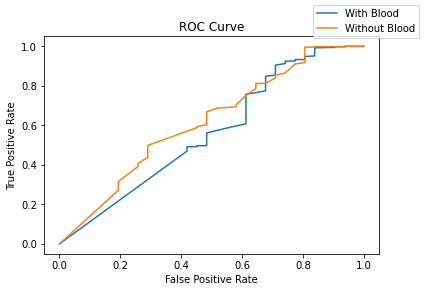

(0.6161495975086668, 0.5633115929255538)

In [49]:

print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Outcome,blacklist)

Ada Boost Classifier
Area Under Curve With Blood: 	 0.7089135671896116
Area Under Curve Without Blood: 	 0.7025383395029086
With Blood - Without 
Differance:	 0.006375227686703067
if AUC with blood is smaller then the value should be negitive


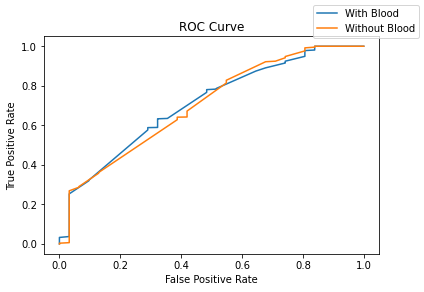

(0.7025383395029086, 0.7089135671896116)

In [50]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Outcome,blacklist)

## without the features from First and second Itteration of Boruta 

In [51]:
blacklist = ['Age', ' Incubation period (days)', 'Cyanosis', 'Risk_Factor_AT', 'Risk_Factor_COPD', 'Risk_Factor_DM', 'Risk_Factor_DMHT', 'Risk_Factor_HT', 'Risk_Factor_NONE'
,'Sore_throat', 'Diarrhea', 'CONTROL_blood_group_B+', 'Risk_Factor_AP']

Logistic Regression
Area Under Curve With Blood: 	 0.626843527821846
Area Under Curve Without Blood: 	 0.659439450026441
With Blood - Without 
Differance:	 -0.03259592220459495
if AUC with blood is smaller then the value should be negitive


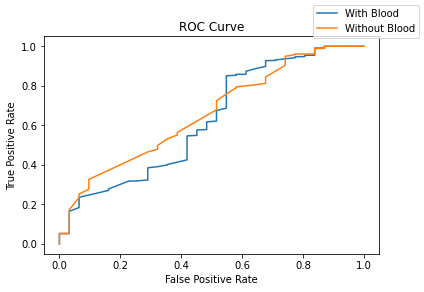

(0.659439450026441, 0.626843527821846)

In [52]:

print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Outcome,blacklist)


KNeighbors Classifier
Area Under Curve With Blood: 	 0.48482578294846934
Area Under Curve Without Blood: 	 0.49757623832187553
With Blood - Without 
Differance:	 -0.012750455373406189
if AUC with blood is smaller then the value should be negitive


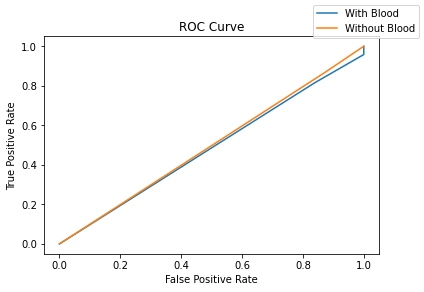

(0.49757623832187553, 0.48482578294846934)

In [53]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Outcome,blacklist)

Decision Tree
Area Under Curve With Blood: 	 0.5263088313061872
Area Under Curve Without Blood: 	 0.5857717844761737
With Blood - Without 
Differance:	 -0.05946295316998651
if AUC with blood is smaller then the value should be negitive


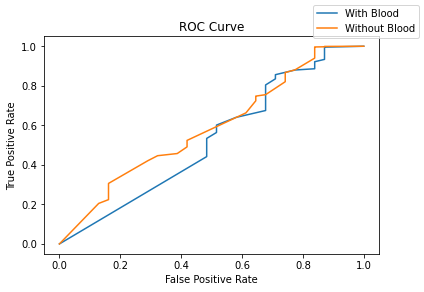

(0.5857717844761737, 0.5263088313061872)

In [54]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Outcome,blacklist)

Random Forest Classifier
Area Under Curve With Blood: 	 0.5209765556143134
Area Under Curve Without Blood: 	 0.6024590163934427
With Blood - Without 
Differance:	 -0.08148246077912924
if AUC with blood is smaller then the value should be negitive


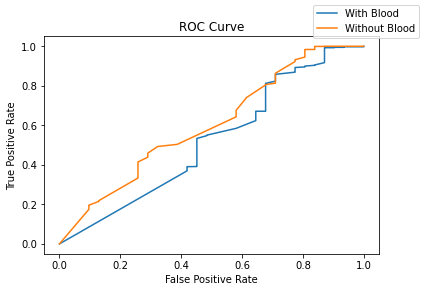

(0.6024590163934427, 0.5209765556143134)

In [55]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Outcome,blacklist)

Ada Boost Classifier
Area Under Curve With Blood: 	 0.6721605264704154
Area Under Curve Without Blood: 	 0.6719842528938246
With Blood - Without 
Differance:	 0.0001762735765907797
if AUC with blood is smaller then the value should be negitive


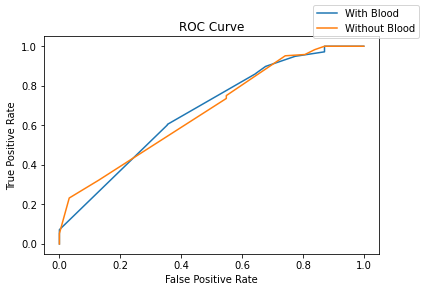

(0.6719842528938246, 0.6721605264704154)

In [56]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Outcome,blacklist)

## without the features from all 3 Itteration of Boruta 

In [57]:
blacklist = ['Age', ' Incubation period (days)', 'Cyanosis', 'Risk_Factor_AT', 'Risk_Factor_COPD', 'Risk_Factor_DM', 'Risk_Factor_DMHT', 'Risk_Factor_HT', 'Risk_Factor_NONE'
,'Sore_throat', 'Diarrhea', 'CONTROL_blood_group_B+', 'Risk_Factor_AP','CONTROL_blood_group_AB+', 'Risk_Factor_CA', 'Headache', 'Risk_Factor_ARF', 'Risk_Factor_CKD', 'Risk_Factor_COPDDM', 'CONTROL_blood_group_O+', 'Cough']

Logistic Regression
Area Under Curve With Blood: 	 0.5396174863387978
Area Under Curve Without Blood: 	 0.5489159175039662
With Blood - Without 
Differance:	 -0.009298431165168375
if AUC with blood is smaller then the value should be negitive


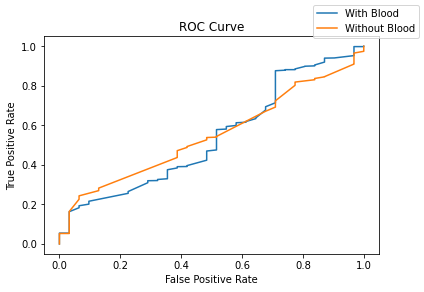

(0.5489159175039662, 0.5396174863387978)

In [58]:
print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Outcome,blacklist)

KNeighbors Classifier
Area Under Curve With Blood: 	 0.470386039132734
Area Under Curve Without Blood: 	 0.48100652212233386
With Blood - Without 
Differance:	 -0.010620482989599833
if AUC with blood is smaller then the value should be negitive


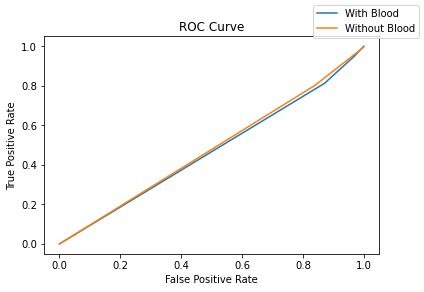

(0.48100652212233386, 0.470386039132734)

In [59]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Outcome,blacklist)


Decision Tree
Area Under Curve With Blood: 	 0.4829749103942652
Area Under Curve Without Blood: 	 0.5309066337622657
With Blood - Without 
Differance:	 -0.047931723368000445
if AUC with blood is smaller then the value should be negitive


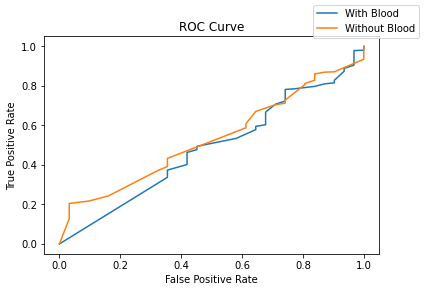

(0.5309066337622657, 0.4829749103942652)

In [60]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Outcome,blacklist)

Random Forest Classifier
Area Under Curve With Blood: 	 nan
Area Under Curve Without Blood: 	 nan
With Blood - Without 
Differance:	 nan
if AUC with blood is smaller then the value should be negitive


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


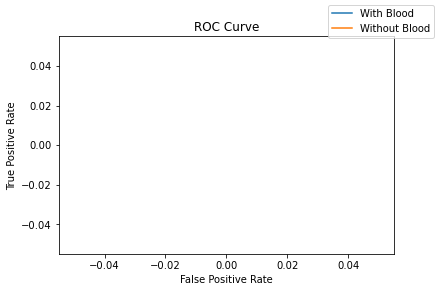

(nan, nan)

In [61]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Severeity,blacklist)

Ada Boost Classifier
Area Under Curve With Blood: 	 0.5109730301427816
Area Under Curve Without Blood: 	 0.5670720958928257
With Blood - Without 
Differance:	 -0.056099065750044086
if AUC with blood is smaller then the value should be negitive


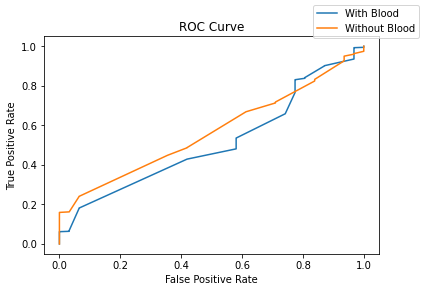

(0.5670720958928257, 0.5109730301427816)

In [62]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Outcome,blacklist)